## Handling Missing Values 

In [3]:
import seaborn as sns

In [4]:
df = sns.load_dataset('titanic')

In [5]:
df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [6]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
df.shape

(891, 15)

In [8]:
df.dropna().shape

(182, 15)

In [9]:
## Column wise deletion
df.dropna(axis=1)

survived  pclass     sex  sibsp  parch     fare   class    who  \
0           0       3    male      1      0   7.2500   Third    man   
1           1       1  female      1      0  71.2833   First  woman   
2           1       3  female      0      0   7.9250   Third  woman   
3           1       1  female      1      0  53.1000   First  woman   
4           0       3    male      0      0   8.0500   Third    man   
..        ...     ...     ...    ...    ...      ...     ...    ...   
886         0       2    male      0      0  13.0000  Second    man   
887         1       1  female      0      0  30.0000   First  woman   
888         0       3  female      1      2  23.4500   Third  woman   
889         1       1    male      0      0  30.0000   First    man   
890         0       3    male      0      0   7.7500   Third    man   

     adult_male alive  alone  
0          True    no  False  
1         False   yes  False  
2         False   yes   True  
3         False   yes  False  
4          True    no   True  
..          ...   ...    ...  
886        True    no   True  
887       False   yes   True  
888       False    no  False  
889        True   yes   True  
890        True    no   True  

[891 rows x 11 columns]

Imputation Missing Value
1. Mean Value Imputation

<Axes: xlabel='age', ylabel='Count'>

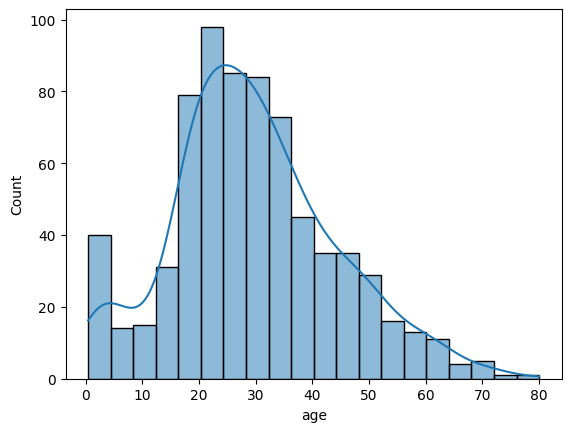

In [10]:
sns.histplot(df['age'],kde=True)

In [11]:
df['age_mean'] = df['age'].fillna(df['age'].mean())

In [12]:
df[['age_mean','age']]

age_mean   age
0    22.000000  22.0
1    38.000000  38.0
2    26.000000  26.0
3    35.000000  35.0
4    35.000000  35.0
..         ...   ...
886  27.000000  27.0
887  19.000000  19.0
888  29.699118   NaN
889  26.000000  26.0
890  32.000000  32.0

[891 rows x 2 columns]

Mean Value Imputation works well when we have a distributed data with no outliers.

2. Median Value Imputation

In [13]:
df['age_median'] = df['age'].fillna(df['age'].median())

In [14]:
df[['age_median','age_mean','age']]

age_median   age_mean   age
0          22.0  22.000000  22.0
1          38.0  38.000000  38.0
2          26.0  26.000000  26.0
3          35.0  35.000000  35.0
4          35.0  35.000000  35.0
..          ...        ...   ...
886        27.0  27.000000  27.0
887        19.0  19.000000  19.0
888        28.0  29.699118   NaN
889        26.0  26.000000  26.0
890        32.0  32.000000  32.0

[891 rows x 3 columns]

3. Mode Imputation Value

In [15]:
df[df['embarked'].isnull()]

survived  pclass     sex   age  sibsp  parch  fare embarked  class  \
61          1       1  female  38.0      0      0  80.0      NaN  First   
829         1       1  female  62.0      0      0  80.0      NaN  First   

       who  adult_male deck embark_town alive  alone  age_mean  age_median  
61   woman       False    B         NaN   yes   True      38.0        38.0  
829  woman       False    B         NaN   yes   True      62.0        62.0

In [16]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [17]:
mode_value=df[df['embarked'].notna()]['embarked'].mode()[0]

In [18]:
df['embarked_mode']=df['embarked'].fillna(mode_value)

In [19]:
df[['embarked_mode','embarked']]

embarked_mode embarked
0               S        S
1               C        C
2               S        S
3               S        S
4               S        S
..            ...      ...
886             S        S
887             S        S
888             S        S
889             C        C
890             Q        Q

[891 rows x 2 columns]

## Handling Imbalance Dataset

1. up sampling
2. down sampling

In [20]:
import pandas as pd
import numpy as np

In [21]:
np.random.seed(123)

#creating the df of 9:1
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

In [22]:
n_class_0, n_class_1

(900, 100)

up sampling (making the minority equal to the majority)

In [23]:
## CREATE MY DATAFRAME WITH IMBALANCED DATASET
class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

In [24]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [25]:
## upsampling
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [26]:
from sklearn.utils import resample
df_minority_upsampled=resample(df_minority,replace=True, #Sample With replacement
         n_samples=len(df_majority),
         random_state=42
        )

In [27]:
df_upsampled=pd.concat([df_majority,df_minority_upsampled])

In [28]:
df_upsampled['target'].value_counts()

target
0    900
1    900
Name: count, dtype: int64

down sampling (making the majority equal to the minority)

In [29]:
## CREATE MY DATAFRAME WITH IMBALANCED DATASET
class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

In [30]:
df = pd.concat([class_0, class_1]).reset_index(drop=True)

# Check the class distribution
print(df['target'].value_counts())

target
0    900
1    100
Name: count, dtype: int64


In [31]:
## downsampling
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

from sklearn.utils import resample
df_majority_downsampled=resample(df_majority,replace=False,
         n_samples=len(df_minority),
         random_state=42
        )

In [32]:
df_majority_downsampled=pd.concat([df_majority,df_minority_upsampled])

In [33]:
df_majority_downsampled['target'].value_counts()

target
0    900
1    900
Name: count, dtype: int64

## SMOTE

In [34]:
from sklearn.datasets import make_classification

In [35]:
x,y = make_classification(n_samples=1000,n_redundant=0,n_features=2,n_clusters_per_class=1, weights=[0.90],random_state=12)

In [36]:
df_x = pd.DataFrame(x,columns=['f1','f2'])
df_y = pd.DataFrame(y,columns=['target'])
final_df = pd.concat([df_x,df_y],axis=1)
final_df.head()

f1        f2  target
0 -0.762898 -0.706808       0
1 -1.075436 -1.051162       0
2 -0.610115 -0.909802       0
3 -2.023284 -0.428945       1
4 -0.812921 -1.316206       0

In [37]:
final_df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

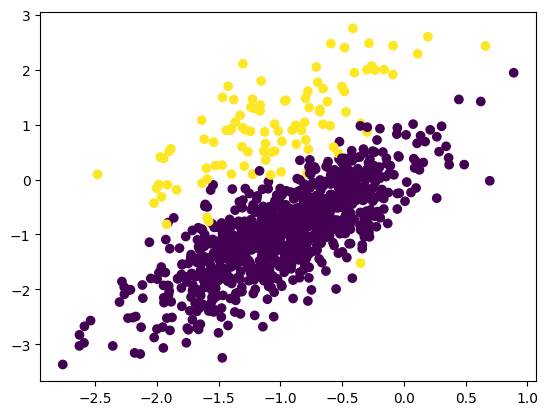

In [38]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])

In [39]:
from imblearn.over_sampling import SMOTE

In [40]:
oversample = SMOTE()
x,y = oversample.fit_resample(final_df[['f1','f2']],final_df['target'])

In [41]:
df_x = pd.DataFrame(x,columns=['f1','f2'])
df_y = pd.DataFrame(y,columns=['target'])
oversample_df = pd.concat([df_x,df_y],axis=1)

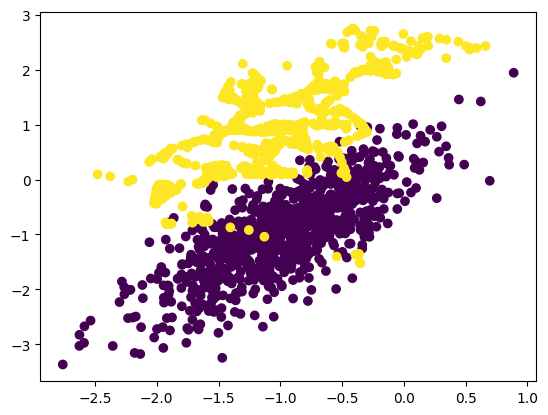

In [42]:
plt.scatter(oversample_df['f1'],oversample_df['f2'],c=oversample_df['target'])

## Data Encoding

1. Nominal/OHE encoding

In [43]:
from sklearn.preprocessing import OneHotEncoder

In [44]:
df = pd.DataFrame({'cars':['verna','city','baleno','swift','ciaz','kushaq']})

In [45]:
encoder = OneHotEncoder()

In [50]:
encoded = encoder.fit_transform(df[['cars']]).toarray()

In [51]:
df_encoded = pd.DataFrame(encoded,encoder.get_feature_names_out())

In [52]:
df_encoded.head()

0    1    2    3    4    5
cars_baleno  0.0  0.0  0.0  0.0  0.0  1.0
cars_ciaz    0.0  0.0  1.0  0.0  0.0  0.0
cars_city    1.0  0.0  0.0  0.0  0.0  0.0
cars_kushaq  0.0  0.0  0.0  0.0  1.0  0.0
cars_swift   0.0  1.0  0.0  0.0  0.0  0.0

2. Label and ordinal encoding

In [53]:
from sklearn.preprocessing import LabelEncoder
lbl_encoder=LabelEncoder()

In [54]:
lbl_encoder.fit_transform(df[['cars']])

/opt/homebrew/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([5, 2, 0, 4, 1, 3])

In [55]:
lbl_encoder.transform([['ciaz']])

/opt/homebrew/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([1])

In [56]:
lbl_encoder.transform([['verna']])

/opt/homebrew/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([5])

In [59]:
## ordinal encoder
from sklearn.preprocessing import OrdinalEncoder

In [60]:
df = pd.DataFrame({
    'size': ['small', 'medium', 'large', 'medium', 'small', 'large']
})

In [61]:
encoder=OrdinalEncoder(categories=[['small','medium','large']])

In [62]:
encoder.fit_transform(df[['size']])

array([[0.],
       [1.],
       [2.],
       [1.],
       [0.],
       [2.]])

3. Target Guided Ordinal Encoding

In [63]:
df = pd.DataFrame({
    'city': ['New York', 'London', 'Paris', 'Tokyo', 'New York', 'Paris'],
    'price': [200, 150, 300, 250, 180, 320]
})

In [64]:
mean_price=df.groupby('city')['price'].mean().to_dict()

In [65]:
df['city_encoded']=df['city'].map(mean_price)

In [66]:
df[['price','city_encoded']]

price  city_encoded
0    200         190.0
1    150         150.0
2    300         310.0
3    250         250.0
4    180         190.0
5    320         310.0

In [68]:
## TRY TARGET ENCODING
df = sns.load_dataset('tips')

In [69]:
df

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

In [73]:
mean_total = df.groupby('time')['total_bill'].mean().to_dict()

/var/folders/51/c5x82mtn7wn6fzx4srlkyzpc0000gn/T/ipykernel_21573/2828910821.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_total = df.groupby('time')['total_bill'].mean().to_dict()


In [74]:
df['encoded_bill'] = df['time'].map(mean_total)

In [79]:
df[['time','encoded_bill']]

time encoded_bill
0    Dinner    20.797159
1    Dinner    20.797159
2    Dinner    20.797159
3    Dinner    20.797159
4    Dinner    20.797159
..      ...          ...
239  Dinner    20.797159
240  Dinner    20.797159
241  Dinner    20.797159
242  Dinner    20.797159
243  Dinner    20.797159

[244 rows x 2 columns]